[1.15778840174637, -0.828894200873183 - 1.11009125203759*I, -0.828894200873183 + 1.11009125203759*I]
xx >  -1.025951141018334  Epot >  1.9444422960918424
xx >  1.0044749742046473  Epot >  1.824291343656283


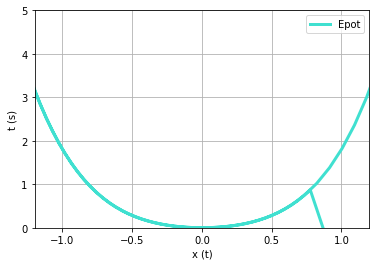

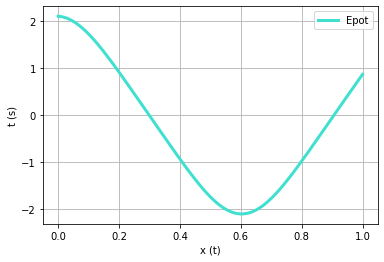

Quando o corpo tem menos de 2J de Energia, o seu movimento entre os seus limites é simetrico, pois a Epot é simetrica
Quando o corpo tem menos de 2J de Energia, os seus extremos nao sdao simetricos, sendo que a sua posiçao media nao coincide com a posiçao de equilibrio. Como a Epot é maior no lado negatico este passa mais tempo nesse lado


In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, Eq, solve


x = symbols('x')

# Tempo inicial e final
ti = 0
tf = 1

# Massa
m = 0.5
k = 1.8
alpha = 0.9
xxEqui = 0

Em = 4

expr = x**2 * (0.5*k + alpha*x*2) - Em

sol = solve(expr)
print(sol)

# Posição inicial
xx0 = np.sqrt(np.sqrt(2 * Em / k)**2 + xxEqui**2)

# Velocidade inicial
vx0 = 0

# Aceleração inicial
ax0 = 0

# dt incremento do tempo e n numero de intervalos
dt = 0.01
n = int((tf - ti) / dt)


# Vetor tempo (n+1 para garantir que nao falta o ultimo dado (Ex: t[10]))
t = np.linspace(ti, tf, n + 1)

# Vetor velocidade (empty e não zeros para não alterar 
# muito o resultado se faltar analisar um dado)
Epot = np.empty(n + 1)
Emec = np.empty(n + 1)
xx = np.empty(n + 1)
vx = np.empty(n + 1)
ax = np.empty(n + 1)

# Introduzir x0 e v0 nos vetores da posição e velocidade
xx[0] = xx0
vx[0] = vx0
ax[0] = ax0


# Preencher os vetores x, v, a
for i in range(n):    

    ax[i] = (-k * xx[i] - 4 * alpha * xx[i]**3) / m
    vx[i + 1] = vx[i] + ax[i] * dt
    xx[i + 1] = xx[i] + vx[i + 1] * dt
    
    Epot[i] = 0.5 * k * xx[i]**2 + alpha * xx[i]**4

    
for i in range(n):
    if (xx[i] < -1 + dt):
        print("xx > ", xx[i], " Epot > ", Epot[i])
        break

for i in range(n):
    if (xx[i] < 1 + dt):
        print("xx > ", xx[i], " Epot > ", Epot[i])
        break

# Plot
plt.axes(xlim=(-1.2, 1.2), ylim=(0, 5))
plt.plot(xx, Epot, label="Epot",  linestyle='-', linewidth=3, color="turquoise")
plt.xlabel("x (t)")
plt.ylabel("t (s)")
plt.legend()         # Legenda só aparece com isto
plt.grid()
plt.show()

plt.plot(t, xx, label="Epot",  linestyle='-', linewidth=3, color="turquoise")
plt.xlabel("x (t)")
plt.ylabel("t (s)")
plt.legend()         # Legenda só aparece com isto
plt.grid()
plt.show()
    
print("Quando o corpo tem menos de 2J de Energia, o seu movimento entre os seus limites é simetrico, pois a Epot é simetrica")
print("Quando o corpo tem menos de 2J de Energia, os seus extremos nao sdao simetricos, sendo que a sua posiçao media nao coincide com a posiçao de equilibrio. Como a Epot é maior no lado negatico este passa mais tempo nesse lado")
    